# Data Analysis and Prediction using Linear Regression Module

## 1. Import Library

In [1]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Add Dataset and Segregate Dataset for each Variant

In [2]:
# Read CSV for all dataset
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')

In [3]:
# Select important dataset only for analysis and prediction

sort_parameter = 'JKT_DAILY_POSTRATE'

covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']].sort_values(by=[sort_parameter])
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']].sort_values(by=[sort_parameter])

## 3. Linear Regression Analysis

### 3.1 Single Variable Prediction between Daily Positive and Positivity Rate

In [4]:
# Import Library for Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

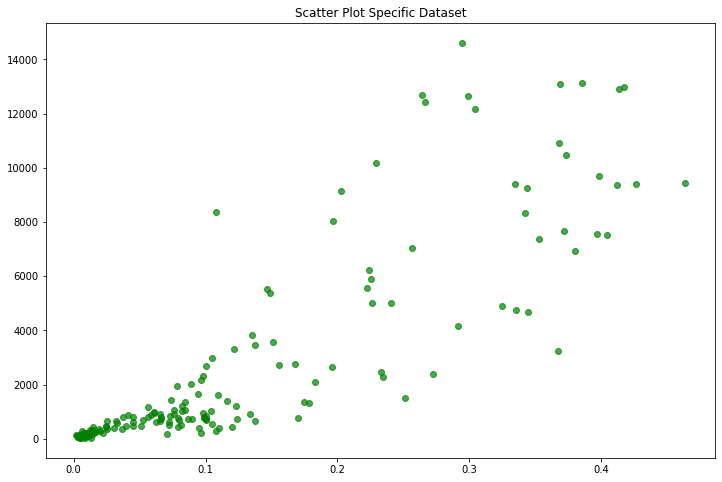

In [5]:
# Initial Plot
xcol = covid_Delta.JKT_DAILY_POSTRATE
ycol = covid_Delta.JKT_DAILY_POSITIVE

plt.figure(figsize=(12,8))
plt.scatter(xcol, ycol, color='g',alpha=0.7)
plt.title("Scatter Plot Specific Dataset")
plt.show()

In [6]:
# Model fitting using Linear Regression Module
LR = LinearRegression()
LR.fit(xcol.values.reshape(-1,1), ycol.values)

#polynomial value
PR = LinearRegression()
polyx = poly.fit_transform(xcol.values.reshape(-1,1))
PR.fit(polyx,ycol)

LinearRegression()

In [8]:
#Use fit model to predict
LRpredict = LR.predict(xcol.values.reshape(-1,1))

PRpredict = PR.predict(polyx)

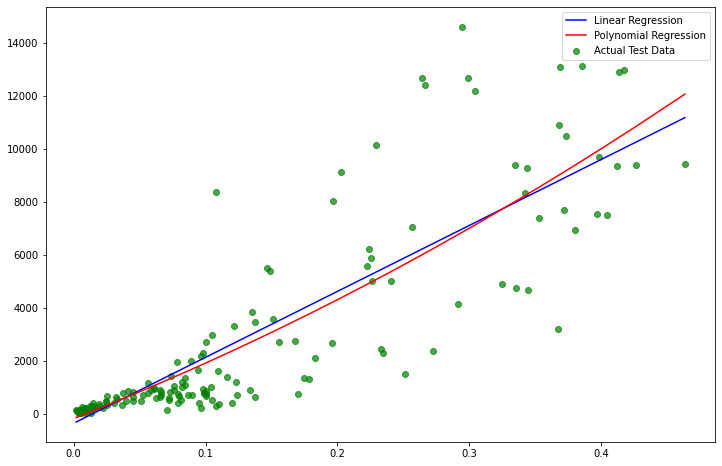

In [10]:
# Plot prediction line against actual test data
plt.figure(figsize=(12,8))
plt.plot(xcol, LRpredict, label='Linear Regression', color='b')
plt.plot(xcol, PRpredict, label='Polynomial Regression', color='r')
plt.scatter(xcol, ycol, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [16]:
#find parameter for Linear Regression

lrcoef = LR.coef_

lrint = LR.intercept_

print("LR Coefficient: ",lrcoef)
print("LR Intercept: ", lrint)

LR Coefficient:  [24908.66386074]
LR Intercept:  -355.28672460648886


In [17]:
#daily_positive_predict = LR.intercept_ + LR.coef_*(daily_postrate)

daily_postrate = 0.4

daily_positive_predict = lrint + lrcoef*daily_postrate

daily_positive_predict

array([9608.17881969])

In [18]:
# direct predict estimated daily_positive_predict using predict

LR.predict(np.array([[0.4]]))[0]

9608.17881968968

In [20]:
# Model scoring

print('Mean squared error (MSE): %.2f'
    % mean_squared_error(ycol, prediction))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(ycol, prediction))

Mean squared error (MSE): 2957482.13
Coefficient of determination (R^2): 0.75


### 4.2 Polynomial Features Single Variable between Daily Positive and Positivity Rate

reference: https://data36.com/polynomial-regression-python-scikit-learn/

In [ ]:
#Start Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
ds_delta = covid_Delta.loc[:, ['Day', 'JKT_DAILY_POSTRATE', 'JKT_DAILY_POSITIVE', 'Risk']].sort_values(by=['JKT_DAILY_POSTRATE'])
ds_delta.head()

In [ ]:
Xpostrate = ds_delta.JKT_DAILY_POSTRATE
ypost = ds_delta.JKT_DAILY_POSITIVE

In [ ]:
# Creating new features

poly_features = poly.fit_transform(Xpostrate.values.reshape(-1,1))

In [ ]:
# Creating the polynomial regression model

PR = LinearRegression()


In [ ]:
# Fit model
PRFIT = PR.fit(poly_features, ypost)

In [ ]:
y_predicted = PR.predict(poly_features)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Xpostrate, y_predicted, label='Polynomial Linear Regression', color='b')
plt.scatter(Xpostrate, ypost, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
print('Mean squared error (MSE): %.2f'
    % mean_squared_error(ypost, y_predicted))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(ypost, y_predicted))

The polynomial regression has _higher Rsquare value_ hence it is expected more accurate.

In [ ]:
PRcoef = PR.coef_

PRint = PR.intercept_

print("PR Coefficient: ",PRcoef)
print("PR Intercept: ", PRint)

In [ ]:
#daily_positive_predict = PR.intercept_ + PR.coef_(1)*(daily_postrate) + PR.coef_(2)*(daily_postrate)^2

daily_postrate = 0.4

daily_positive_predict = PRint + 19386.03038933*daily_postrate + 15207.14891575*daily_postrate**2

daily_positive_predict

In [ ]:
# Prediction using Predict

PR.predict(poly.fit_transform([[0.4]]))

### 4.3 Prediction using Multiple Variable in Linear Regression

Selected variable are 